# Module 05 - Exploratory Data Analysis
In this module, we look into Exploratory Data Analysis (EDA), a critical first step in any data science project.
We will set up our environment by importing essential libraries, loading datasets, and performing preliminary analysis to understand the data’s structure, distribution, and potential issues. This process lays the groundwork for any further modeling or hypothesis testing.

### Set up the environment
In the following steps, we ensure that our workspace is equipped with the necessary tools for data manipulation, visualization, and statistical analysis.

In [2]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Loading the Car Features Dataset
In this step, we load a dataset that contains various features of cars. This dataset includes details such as the car's
make, model, year, fuel type, and performance metrics like city and highway MPG. Understanding the structure of this dataset
will help us in performing meaningful exploratory analysis later on.


In [3]:
df_cars = pd.read_csv('../../Datasets/carfeatures.csv')
# Adapt your path to the location of the dataset

## Data Familiarization
In this section, we perform an initial exploration of the car dataset.

Our goals are to:
 - **Identify data types:** Understand what kind of data each column holds (e.g., numerical, categorical).
 - **Detect missing values:** Find any absent data points that might need handling.
 - **Count entries:** Check the total number of rows to gauge the dataset's size.
 - **Examine ranges:** Look at the minimum and maximum values for numerical columns.
 - **Sample entries:** Display a few rows to visually inspect the data.
 - **Review unique values:** For categorical variables, list unique values to understand the diversity in the data.

These steps are crucial to ensure data quality before moving forward with deeper analyses.


In [4]:
df_cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


You can use `.info()` to get a concise summary of the dataset, including the data types and the number of non-null entries. This method is useful for quickly assessing the dataset's size and structure.


In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

You may also want to check the range of your data. You can use min(), max(), or describe() to get the minimum and maximum values of each column. This information can help you identify potential outliers or errors in the data. For instance, let's look at the Year range in the car dataset.

In [6]:
df_cars["Year"].min(),df_cars["Year"].max()

(1990, 2017)

What about the different makes? We can use unique to get the unique values in the Make column.

In [7]:
df_cars["Make"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

What about Vehicle Style?

In [8]:
df_cars["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

## Descriptive Statistics
Here, we compute key statistical metrics that summarize the main features of the dataset:
 - **Mean:** The average value, which gives an idea of the central tendency.
 - **Standard Deviation:** Indicates how much variation exists around the mean.
 - **Median:** The middle value when the data is sorted, less affected by outliers.
 - **Quantiles (e.g., quartiles):** Divide the data into intervals, offering insight into the distribution spread.

These statistics provide an overall summary that can be used to compare and contrast different subsets of the data.


In [9]:
df_cars["highway MPG"].mean()

26.637485311398354

In [10]:
df_cars["city mpg"].mean()

19.73325499412456

In [11]:
df_cars["highway MPG"].std()

8.863000766979432

In [12]:
df_cars["city mpg"].std()

8.987798160299246

In [13]:
df_cars["city mpg"].quantile(0.5)

18.0

## Statistical Summary of the Data
In this step, we generate a comprehensive summary table of the dataset that includes the count, mean, standard deviation,
and various percentiles for each numeric column. This summary gives a quick, overall snapshot of the distribution and
central tendencies within the data.


In [14]:
df_cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


## Distributions
We now turn our attention to the distribution of key variables by visualizing them with histograms. Histograms allow us to
see the frequency of data points across different ranges, highlighting the shape of the distribution (e.g., skewness, modality)
and potential anomalies or outliers. In the following example, we visualize the distribution of 'city mpg'.


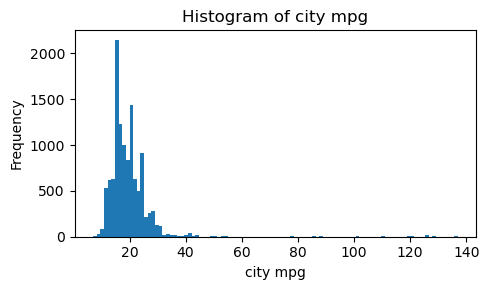

In [15]:
fig = plt.figure(figsize=(5, 3))
plt.hist(df_cars['city mpg'],bins=100)
plt.xlabel('city mpg')
plt.ylabel('Frequency')
plt.title('Histogram of city mpg')
plt.tight_layout()
plt.show()

 ## Investigating Outliers in the Cars Dataset

 Now let's return to our cars dataset to identify potential outliers. Outliers can significantly influence statistical analyses.
 Here, we first visualize the distribution of the 'city mpg' variable, then apply a z-score normalization to highlight data points
 that lie far from the mean. This helps us in detecting and potentially handling extreme values in our dataset.


Do we see any outliers? Let's try z-scoring (standardizing)...

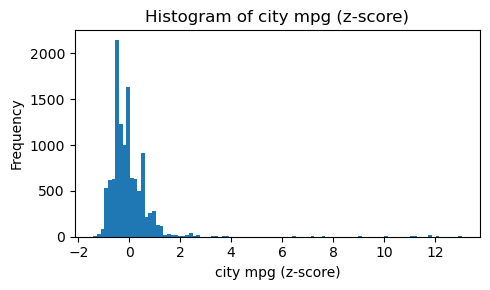

In [16]:
zscore_city_mpg = stats.zscore(df_cars['city mpg'])
# zscore_city_mpg = (df_cars['city mpg'] - df_cars['city mpg'].mean())/df_cars['city mpg'].std()
fig = plt.figure(figsize=(5, 3))
plt.hist(zscore_city_mpg,bins=100)
plt.xlabel('city mpg (z-score)')
plt.ylabel('Frequency')
plt.title('Histogram of city mpg (z-score)')
plt.tight_layout()
plt.show()

What is the problem?

In [17]:
df_cars[zscore_city_mpg>3]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1202,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,31905
1203,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,29155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170
9870,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25560
9871,Chevrolet,Spark EV,2016,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25510


So let's remove the outliers and see the distribution again.

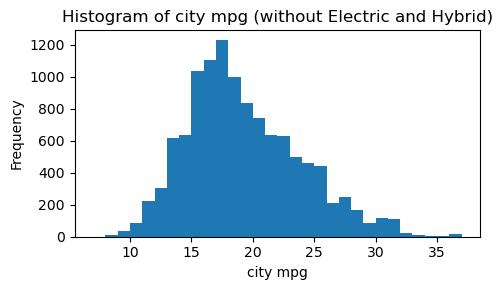

In [18]:
df_cars_filtered = df_cars[~((df_cars['Engine Fuel Type'] == 'electric') |
                        (df_cars['Market Category'].str.contains('Hybrid')))]

fig = plt.figure(figsize=(5, 3))
plt.hist(df_cars_filtered['city mpg'], bins=30)
plt.xlabel('city mpg')
plt.ylabel('Frequency')
plt.title('Histogram of city mpg (without Electric and Hybrid)')
plt.tight_layout()
plt.show()

 ## Correlation Analysis (Multivariate Exploration)

 In this section, we examine the relationships between numeric variables within the filtered cars dataset.
 By calculating correlation coefficients, we can quantify how strongly variables are related to one another.

 We will:
 - Compute the correlation between specific variables (e.g., city mpg vs. highway MPG).
 - Generate a correlation matrix for all numeric variables.
 - Visualize the correlation matrix using heatmaps for both Pearson and Spearman methods.


In [19]:
# calculate the correlation between city mpg and highway mpg

df_cars_filtered['city mpg'].corr(df_cars_filtered['highway MPG'])

0.8520452086020569

We can also create a table of correlation. You can use seaborn for that.

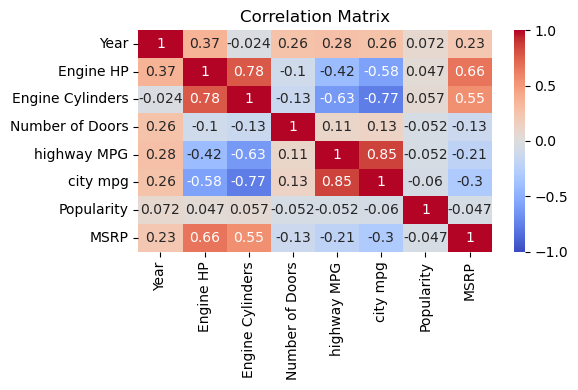

In [20]:
numeric_variables = df_cars_filtered.select_dtypes(include=np.number)
correlation_table = numeric_variables.corr()
correlation_table


# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

For non-linear relationships, we can use the Spearman correlation coefficient.

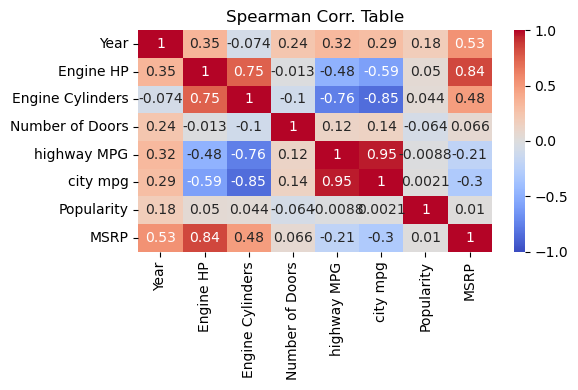

In [21]:
# same but for Spearman
correlation_table = numeric_variables.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Corr. Table')
plt.tight_layout()
plt.show()


## Visualizing some trends in the car dataset
In this section, we will explore some trends in the car dataset by visualizing the relationship between different variables.

For instance, how the 'city mpg' changed over the years?

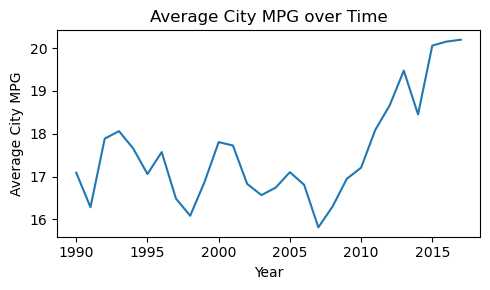

In [22]:
# Check trends of city MPG over time (average over time)
plt.figure(figsize=(5, 3))
df_cars_filtered.groupby("Year")["city mpg"].mean().plot()
plt.ylabel('Average City MPG')
plt.title('Average City MPG over Time')
plt.tight_layout()
plt.show()


We can also look at the City MPG across different makes.

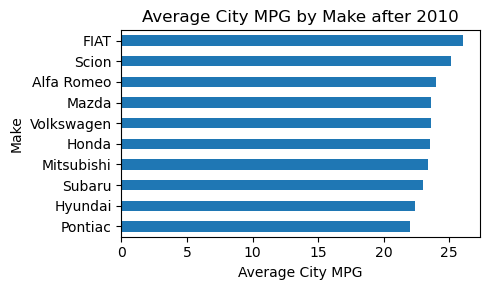

In [23]:
# plot brands with highest average city MPG after 2010
plt.figure(figsize=(5, 3))
cars_means = df_cars_filtered[df_cars_filtered['Year'] >= 2010].groupby("Make")["city mpg"].mean()
cars_means = cars_means.sort_values(ascending=False).head(10)
ax = cars_means.plot(kind="barh")
plt.xlabel('Average City MPG')
plt.title('Average City MPG by Make after 2010')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Exploring a Different Dataset: The Iris Dataset
Let's try a different dataset: the Iris dataset, which is widely used in machine learning and statistics.
This dataset contains measurements of different Iris flower species, including:

 - Sepal Length and Width
 - Petal Length and Width

By visualizing the histograms of these measurements, we can observe differences in distribution among the species and
gain insights into the inherent patterns of this classic dataset.


Let's try a different dataset (Iris dataset). This one contains measurements of different species of Iris flowers.

In [24]:
df_iris = pd.read_csv('../../Datasets/iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


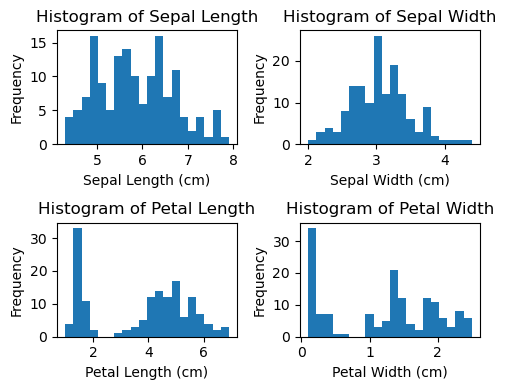

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 4))

# Plot SepalLengthCm
axes[0, 0].hist(df_iris['SepalLengthCm'], bins=20)
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Sepal Length')

# Plot SepalWidthCm
axes[0, 1].hist(df_iris['SepalWidthCm'], bins=20)
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Sepal Width')

# Plot PetalLengthCm
axes[1, 0].hist(df_iris['PetalLengthCm'], bins=20)
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Petal Length')

# Plot PetalWidthCm
axes[1, 1].hist(df_iris['PetalWidthCm'], bins=20)
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Petal Width')

plt.tight_layout()
plt.show()

## Analyzing Petal Length by Species

Here, we take a closer look at the 'PetalLengthCm' feature in the Iris dataset by plotting its distribution for each species.
This comparison helps reveal how petal length varies across different types of Iris flowers and can be an indicator for species
classification or further statistical analysis.


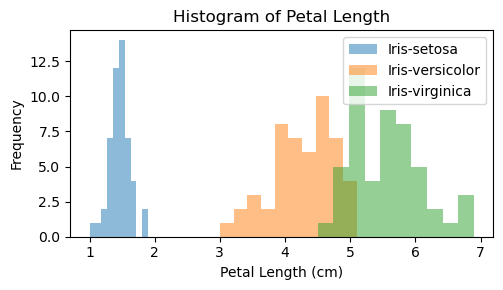

In [26]:
fig = plt.figure(figsize=(5, 3))
for species, group in df_iris.groupby('Species'):
    plt.hist(group['PetalLengthCm'], bins=10, alpha=0.5, label=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.legend()
plt.tight_layout()
plt.show()



## Analyzing Social Media Data: Tweets on the Ukraine-Russia Conflict
Now let's see some social media data. Tweets about the Ukraine-Russia conflict.

We load the dataset, define data types for specific columns, and display a sample of the data.
The analysis will include:
 
 - Checking for missing values in the dataset.
 - Visualizing the distribution of the 'RetweetCount' field.

This helps in understanding the dynamics and reach of tweets regarding this ongoing conflict.


In [27]:
dtypes = {
    "Tweet Id" : "str",
    "ConversationId": "str",
}
df_ukraine = pd.read_csv('../../Datasets/Ukraine_tweets.csv',dtype=dtypes)
df_ukraine.head()

/var/folders/jh/xkyk5yn976z_y46xvbg2kjjm0000gn/T/ipykernel_7232/1895728512.py:5: DtypeWarning: Columns (0,2,3,4,5,6,7,11,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ukraine = pd.read_csv('../../Datasets/Ukraine_tweets.csv',dtype=dtypes)


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141897,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1496687731434565636,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1496688201242759177,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


Do we have any missing values in the dataset?

In [28]:
# Summary with missing values
df_ukraine.describe()

,ReplyCount,RetweetCount,LikeCount,hastag_counts
count,44070.000000,44070.000000,4.407000e+04,44066.000000
mean,0.887474,2.671681,1.368781e+14,4.039827
std,10.443866,37.890258,1.436683e+16,2.685003
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000e+00,2.000000
50%,0.000000,0.000000,1.000000e+00,3.000000
75%,0.000000,1.000000,2.000000e+00,5.000000
max,945.000000,5436.000000,1.508172e+18,29.000000


Let's visualize the distribution of the number of times a tweet was retweeted.

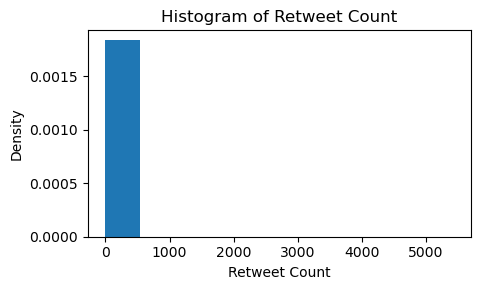

In [29]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
retweetCount = df_ukraine['RetweetCount'].dropna() # Remove missing values
plt.hist(retweetCount, density=True)
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.title('Histogram of Retweet Count')
plt.tight_layout()
plt.show()

# increase number of bins

Oh no, we can't see much. Let's try to use a log-log scale to visualize the distribution of retweet counts.

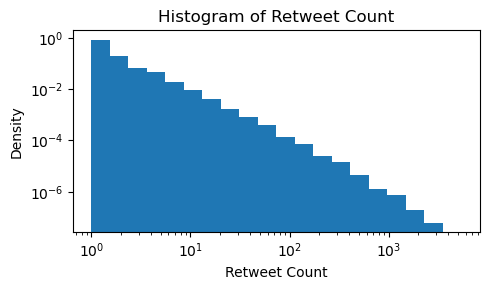

In [30]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
retweetCount = df_ukraine['RetweetCount'].dropna() # Remove missing values
bins = np.logspace(0,np.log10(retweetCount.max()), 21)
plt.hist(retweetCount, density=True,bins=bins)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.title('Histogram of Retweet Count')
plt.tight_layout()
plt.show()

We can also use a circles instead of bars. This way, we can see the distribution more clearly.

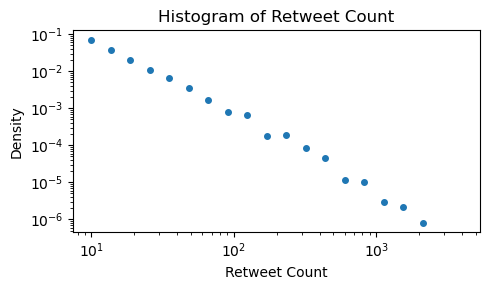

In [31]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
hist, bins = np.histogram(retweetCount, bins=np.logspace(1, np.log10(retweetCount.max()), 21),density=True)
plt.plot(bins[:-1], hist,"o ",ms=4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.title('Histogram of Retweet Count')
plt.tight_layout()
plt.show()


## Investigating the Anscombe Quartet data
The Anscombe's quartet is a set of four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. This example illustrates the importance of visualizing data before drawing conclusions.

Let's start loading it...

In [32]:
df_anscombe = pd.read_csv('../../Datasets/Anscombe_quartet_data.csv')
df_anscombe.head()

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47


In [33]:
df_anscombe.mean()

x123    9.000000
y1      7.500909
y2      7.500909
y3      7.500000
x4      9.000000
y4      7.500909
dtype: float64

In [34]:
df_anscombe.std()

x123    3.316625
y1      2.031568
y2      2.031657
y3      2.030424
x4      3.316625
y4      2.030579
dtype: float64

Let's calculate the correlation between the variables.

In [35]:
correlation_x123_y1 = df_anscombe['x123'].corr(df_anscombe['y1'])
correlation_x123_y2 = df_anscombe['x123'].corr(df_anscombe['y2'])
correlation_x123_y3 = df_anscombe['x123'].corr(df_anscombe['y3'])
correlation_x4_y4 = df_anscombe['x4'].corr(df_anscombe['y4'])

print('Correlation between x1 and y1: ', correlation_x123_y1)
print('Correlation between x2 and y2: ', correlation_x123_y2)
print('Correlation between x3 and y3: ', correlation_x123_y3)
print('Correlation between x4 and y4: ', correlation_x4_y4)


Correlation between x1 and y1:  0.81642051634484
Correlation between x2 and y2:  0.8162365060002428
Correlation between x3 and y3:  0.8162867394895984
Correlation between x4 and y4:  0.8165214368885028


Now, it is time to visualize the data.

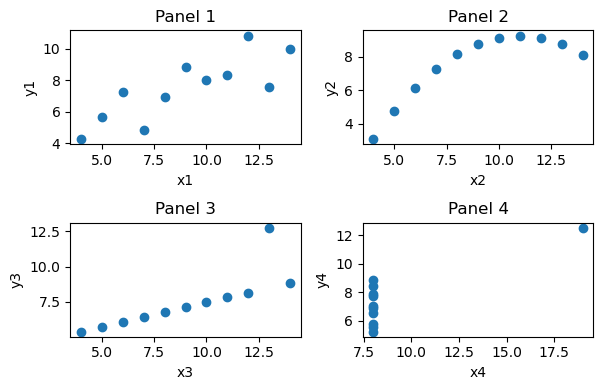

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

# Panel 1
axes[0, 0].plot(df_anscombe['x123'], df_anscombe['y1'], 'o')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('y1')
axes[0, 0].set_title('Panel 1')

# Panel 2
axes[0, 1].plot(df_anscombe['x123'], df_anscombe['y2'], 'o')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('y2')
axes[0, 1].set_title('Panel 2')

# Panel 3
axes[1, 0].plot(df_anscombe['x123'], df_anscombe['y3'], 'o')
axes[1, 0].set_xlabel('x3')
axes[1, 0].set_ylabel('y3')
axes[1, 0].set_title('Panel 3')

# Panel 4
axes[1, 1].plot(df_anscombe['x4'], df_anscombe['y4'], 'o')
axes[1, 1].set_xlabel('x4')
axes[1, 1].set_ylabel('y4')
axes[1, 1].set_title('Panel 4')

plt.tight_layout()
plt.show()


See, the datasets are very similar in terms of mean, variance, correlation, and regression line, but they look very different when plotted.

## Scatterplot Matrix
A scatterplot matrix is a grid of scatterplots that allows us to visualize the pairwise relationships between multiple variables in a dataset. It is a powerful tool for identifying correlations, trends, and potential outliers across different dimensions of the data.
In this example, we will create a scatterplot matrix for the cars dataset.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn works well with pandas data structures and integrates closely with matplotlib. With seaborn it is easy to create scatterplot matrices.

For more examples check out the seaborn documentation: https://seaborn.pydata.org/examples/scatterplot_matrix.html

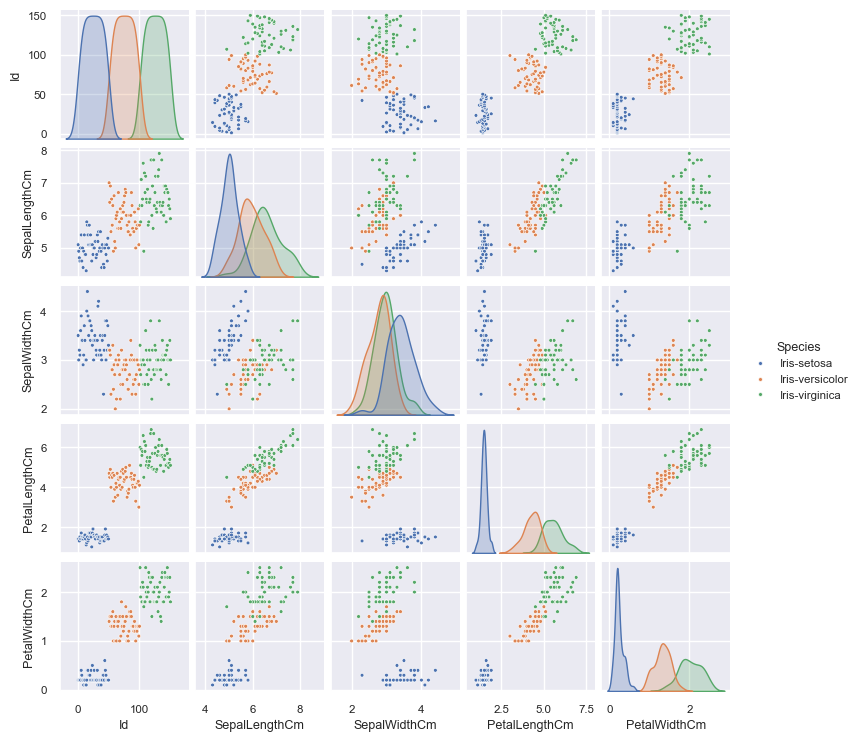

In [37]:
# for the iris dataset
sns.set_theme(font_scale=0.75)  # Set the font scale to reduce the font size
sns.pairplot(df_iris, hue='Species', height=1.5, markers='.', plot_kws={'s': 30}) 
plt.show()

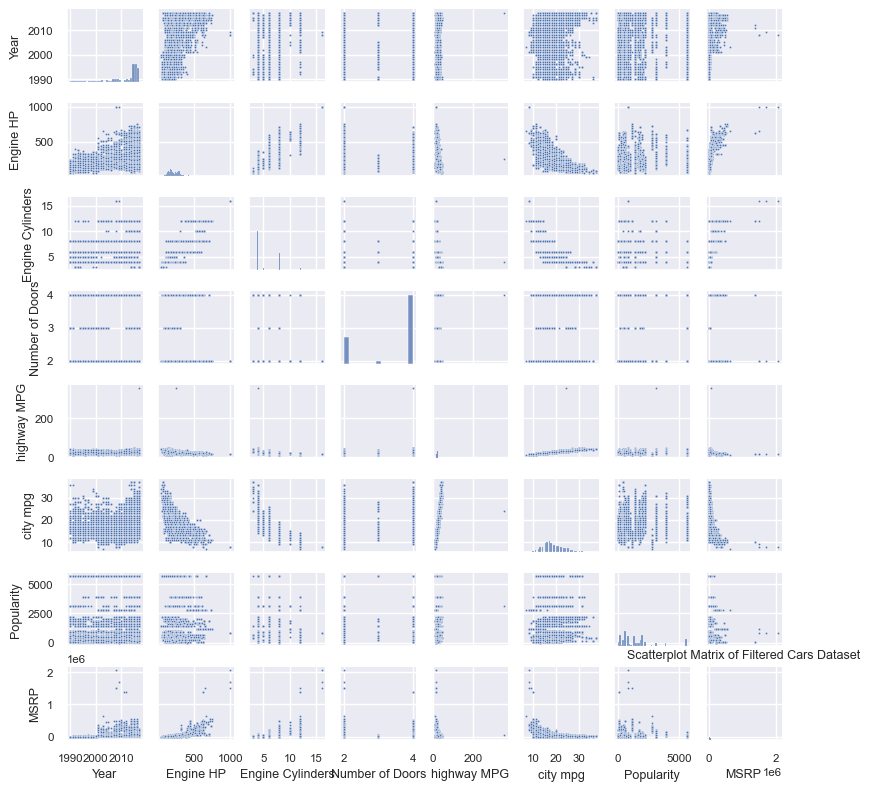

In [38]:
# For the cars dataset
df_cars_filtered_numeric = df_cars_filtered.select_dtypes(include=np.number)
sns.set(font_scale=0.75)  # Set the font scale to reduce the font size
sns.pairplot(df_cars_filtered_numeric, height=1, markers='.', plot_kws={'s': 10})
plt.title("Scatterplot Matrix of Filtered Cars Dataset")
plt.show()

# More confusing, right? But we can see patterns already